# Analysis of a Telegraph Noise Measurement

Here we are analyzing a quantum point contact measurement. We will extract 
tunneling rate and check for stationarity.

In [1]:
import QuantumPolyspectra as qp
import matplotlib.pyplot as plt
import numpy as np

Actual T_window: 0.125
Maximum frequency: 5000.0
Number of points: 51


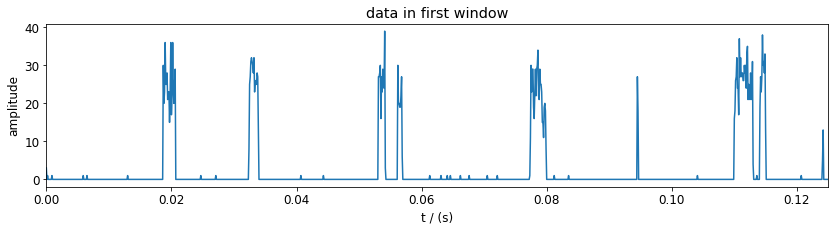

chunk shape:  1250


In [2]:
path = 'example_data/long_measurement.h5'
group_key = 'day1'
data_set = 'measurement1'
spec = qp.FitTelegraph(path, group_key, data_set)
f_max = 0.4e3
m = 10
T_window = 0.125

f, s, serr = spec.calc_spec(order_in=[2,3,4], backend='opencl', T_window=T_window, f_max=f_max, m=m, m_var=10, m_stationarity=80)

Let's see what the polyspectra look like.

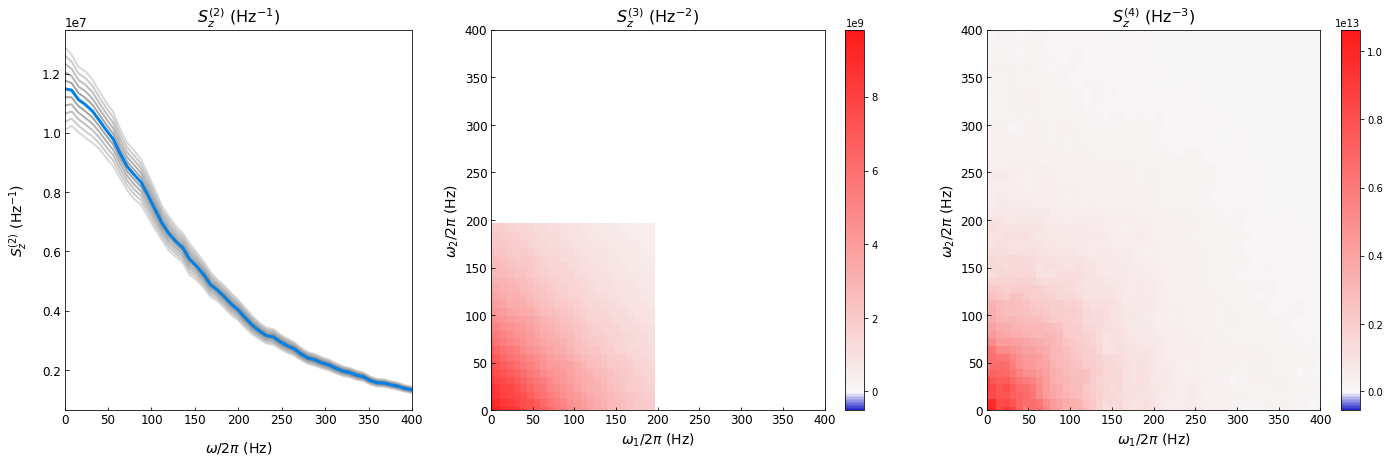

In [3]:
fig = spec.plot(arcsinh_plot=False, sigma=5, f_max=0.4e3, green_alpha=0.0, arcsinh_const=1e-4, contours=False)

We can check if something change in the powerspectra during the measurements.

One spectrum calculated from a 100.0 s measurement


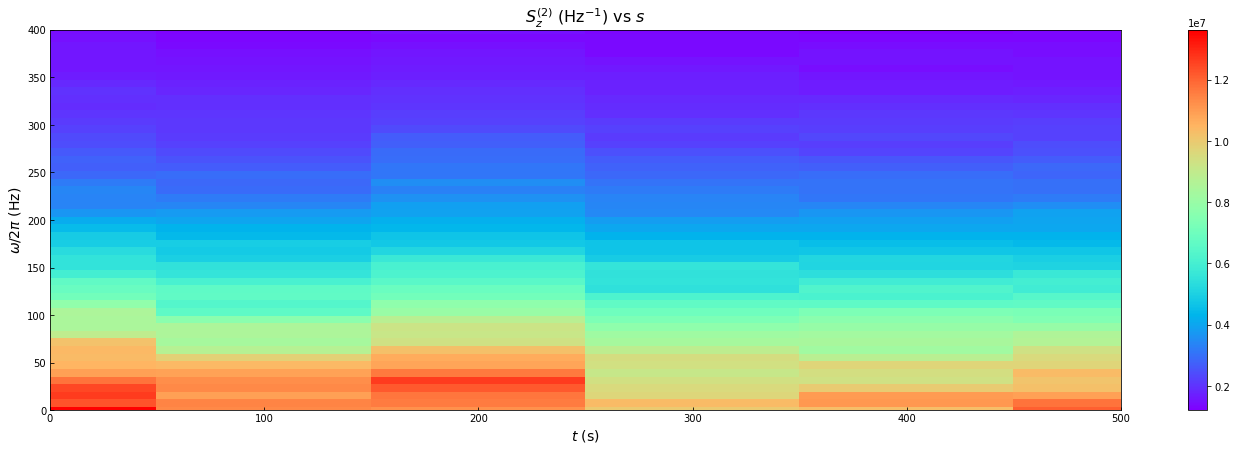

In [4]:
spec.stationarity_plot(arcsinh_plot=False, arcsinh_const=1e-2, s2_filter=0, contours=False, f_max=0.4e3, normalize=None)

Now we can fit the tunneling rates. We just have to specify initial 
values for the tunneling parameters.

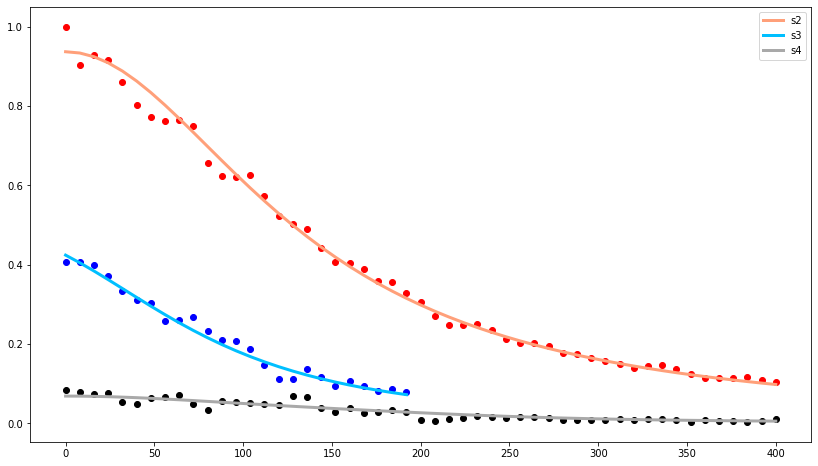

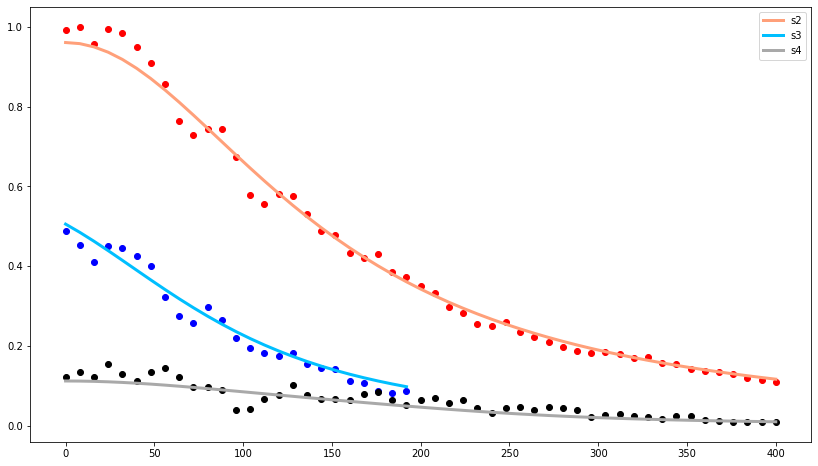

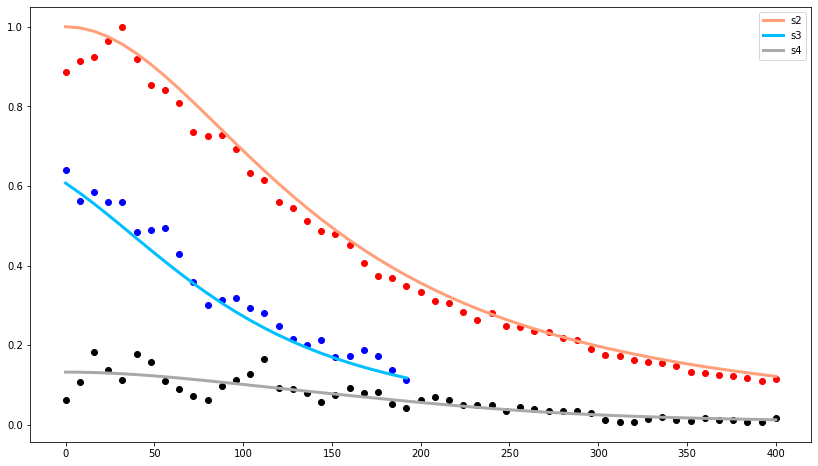

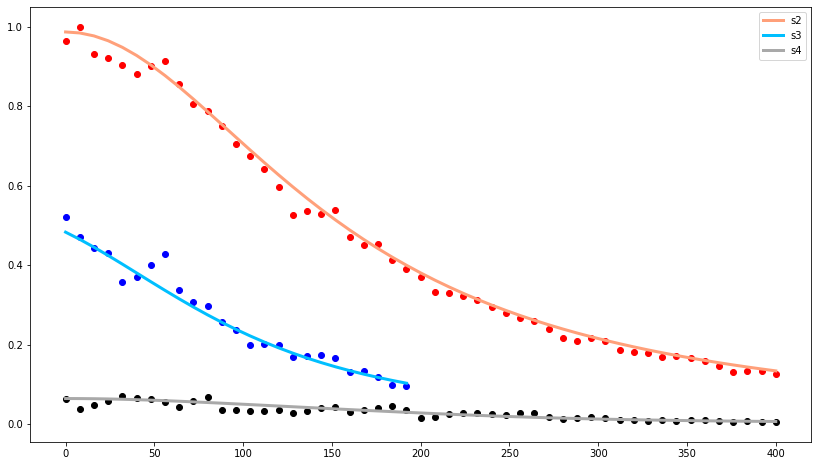

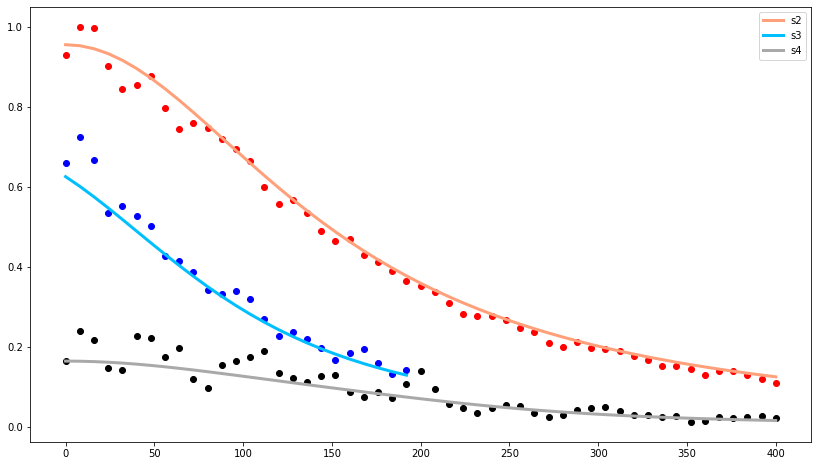

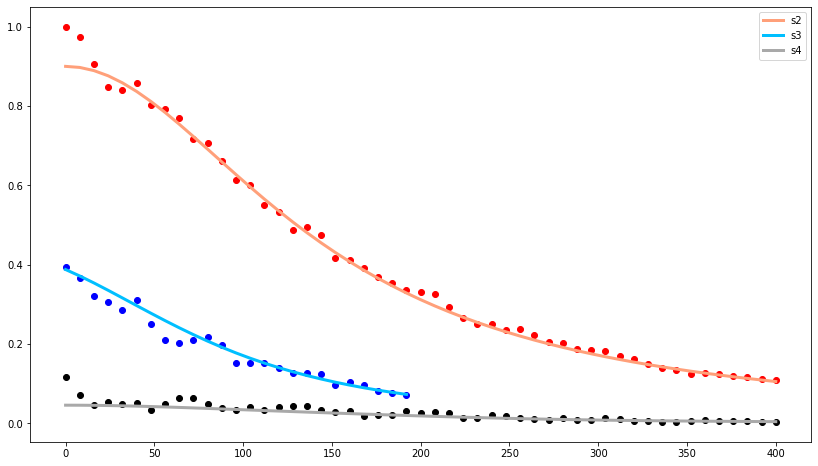

In [5]:
starting_gammas = [[700, 10]]
beta = 100
c = 0
betas, gamma_ins, gamma_ins_err, gamma_outs, gamma_outs_err = spec.fit_stationarity_plot(starting_gammas=starting_gammas, beta=beta, c=c, with_s4=True, filter=0, plot=True, with_err=True)

Afterward we can check for the stability of the tunneling rates.

In [10]:
gamma_ins_err = [0]*len(gamma_ins)
gamma_outs_err = [0]*len(gamma_outs)

In [14]:
def plot_fit(self, gamma_ins, gamma_ins_err, gamma_outs, gamma_outs_err, filter=10, ylim=False):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 7))
    plt.rc('text', usetex=False)
    plt.rc('font', size=10)
    plt.rcParams["axes.axisbelow"] = False

    t_for_one_spec = self.m[2] * self.T_window
    time_axis = np.arange(0, len(self.S_stationarity[2]) * t_for_one_spec, t_for_one_spec)[::(filter+1)]
    
    ax2 = ax.twinx()
    l1 = ax.errorbar(time_axis, gamma_ins, yerr=gamma_ins_err, color='blue', label=r'$\gamma_{in}$')
    l2 = ax2.errorbar(time_axis, gamma_outs, yerr=gamma_outs_err, color='orange', label=r'$\gamma_{out}$')
    ax.set_xlabel(r"$t$ (s)", fontdict={'fontsize': 14})
    ax.set_ylabel(r"$\gamma_{in}$ (Hz)", fontdict={'fontsize': 14})
    ax2.set_ylabel(r"$\gamma_{out}$ (Hz)", fontdict={'fontsize': 14})
    ax.tick_params(axis='both', direction='in')
    ax.set_title(r'10 T @ 0.389V: $\gamma$ vs $t$',
             fontdict={'fontsize': 16})
    
    plt.xlim([0, np.max(time_axis)])
    if ylim:
        plt.ylim([0, ylim])
        
    plt.legend([l1, l2], [r'$\gamma_{in}$', r'$\gamma_{out}$'])


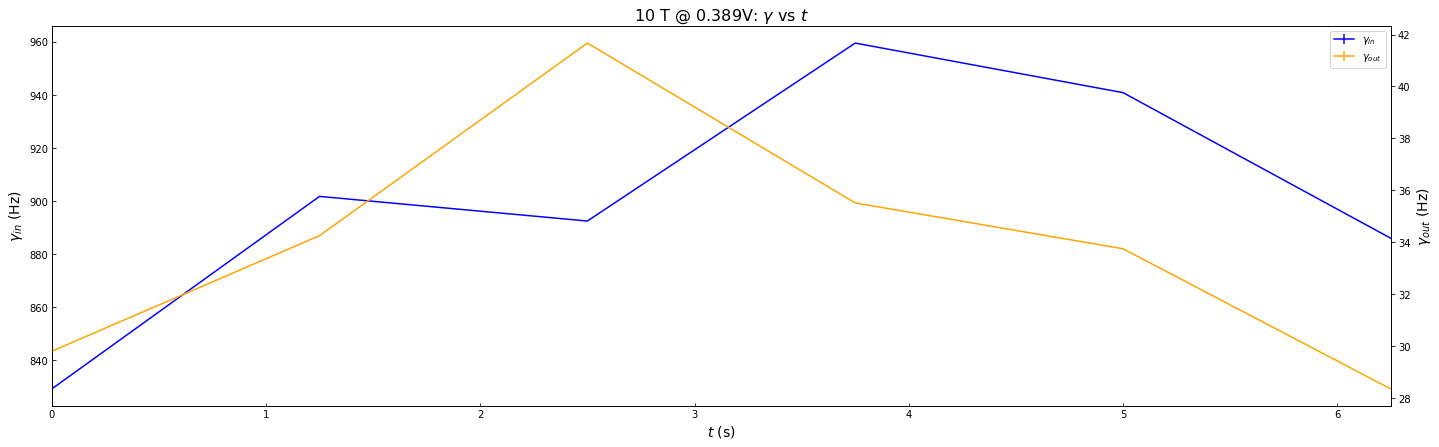

In [15]:
plot_fit(spec, gamma_ins, gamma_ins_err, gamma_outs, gamma_outs_err, filter=0)